In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, pickle

from utils.latticeeasy import *
from utils.label_utils import label_blobs, get_labels

# Load data

In [10]:
output_dir = "/media/yangelaxue/TRANSFER/Colliding_Oscillons/alpha_beta-0.05_25_695.675659/smash_osc7_osc1_0.001c_v2"

data = LATTICEEASY(output_dir)
data.__dict__

{'output_dir': '/media/yangelaxue/TRANSFER/Colliding_Oscillons/alpha_beta-0.05_25_695.675659/smash_osc7_osc1_0.001c_v2',
 'alpha': 0.05,
 'beta': 25.0,
 'phi_0': 0.06424,
 'dt_pr': 0.001,
 'domain_width_pr': array([0.823908, 0.823908, 0.823908]),
 'domain_dimensions': (256, 256, 256),
 't': array([ 4.99982 , 10.000412, 15.002434, 24.99789 , 34.992397, 44.986904,
        50.000149]),
 '_slice_tidx': array([0, 1, 2, 3, 4, 5, 6]),
 'a': array([5.425725, 5.425725, 5.425725, 5.425725, 5.425725, 5.425725,
        5.425725]),
 'ap': array([0., 0., 0., 0., 0., 0., 0.]),
 'app': array([0., 0., 0., 0., 0., 0., 0.]),
 'rescale_A': 15.56662515566625,
 'rescale_B': 2.8019852063808336e-06,
 'rescale_r': 2.857142857142857,
 'rescale_s': 2.714285714285714}

# Find velocity

In [11]:
s = get_s(data.alpha)
c_pr = 1/data.a[0]**(s+1)
c_pr

0.001870742304743387

In [12]:
WHOLE_FIELD = False
if WHOLE_FIELD:
    f_ext = "_field"
else:
    f_ext = ""

In [13]:
timeslices = [i for i in range(0,data.t.size,1)][::]

In [18]:
coms_t_dict = pickle.load(open(os.path.join(output_dir,f"coms_t_dict{f_ext}.p"),'rb'))
com_velocities_t_dict = pickle.load(open(os.path.join(output_dir,f"com_velocities_t_dict{f_ext}.p"),'rb'))
# expected_velocities_t_dict = pickle.load(open(os.path.join(output_dir,f"expected_velocities_t_dict{f_ext}.p"),'rb'))

In [19]:
com_velocities = np.array([com_velocities_t_dict[data.t[timeslice]] for timeslice in timeslices[:-1]])
# expected_velocities = np.array([expected_velocities_t_dict[data.t[timeslice]] for timeslice in timeslices])

In [21]:
coms_t_dict

{4.99982: [array([0.2389155 , 0.41207706, 0.4134943 ]),
  array([0.57878483, 0.41349662, 0.41370263])],
 10.000412: [array([0.23888579, 0.41203379, 0.41342222]),
  array([0.57893814, 0.41342456, 0.41362631])],
 15.002434: [array([0.23886532, 0.41199526, 0.41334825]),
  array([0.57910333, 0.41334183, 0.4135144 ])],
 24.99789: [array([0.23891518, 0.41200257, 0.41327956]),
  array([0.57933883, 0.4131904 , 0.41331964])],
 34.992397: [array([0.23905947, 0.41204581, 0.41325475]),
  array([0.57935403, 0.41312162, 0.41322926])],
 44.986904: [array([0.23907048, 0.41206661, 0.41324432]),
  array([0.57939144, 0.41310759, 0.41315738])],
 50.000149: [array([0.23908937, 0.41208052, 0.41319293]),
  array([0.5794916 , 0.41308097, 0.41309133])]}

In [30]:
coms_t_1 = np.array([coms_t_dict[data.t[timeslice]][0] for timeslice in timeslices])
coms_t_2 = np.array([coms_t_dict[data.t[timeslice]][1] for timeslice in timeslices])

com_velocity_1 = np.diff(coms_t_1,axis=0)/np.tile(np.diff(data.t[timeslices]),(3,1)).T
com_velocity_2 = np.diff(coms_t_2,axis=0)/np.tile(np.diff(data.t[timeslices]),(3,1)).T

In [33]:
com_velocity_1/c_pr, com_velocity_2/c_pr

(array([[-0.00317636, -0.00462562, -0.00770462],
        [-0.00218748, -0.00411739, -0.007905  ],
        [ 0.00266645,  0.00039124, -0.00367372],
        [ 0.00771727,  0.00231252, -0.00132712],
        [ 0.00058913,  0.00111259, -0.00055741],
        [ 0.00201328,  0.00148321, -0.00548008]]),
 array([[ 0.01638885, -0.00770316, -0.00815892],
        [ 0.01765293, -0.00884075, -0.01195863],
        [ 0.01259432, -0.00809829, -0.01041595],
        [ 0.00081312, -0.00367871, -0.00483394],
        [ 0.00200056, -0.00075024, -0.00384441],
        [ 0.01068052, -0.00283861, -0.00704186]]))

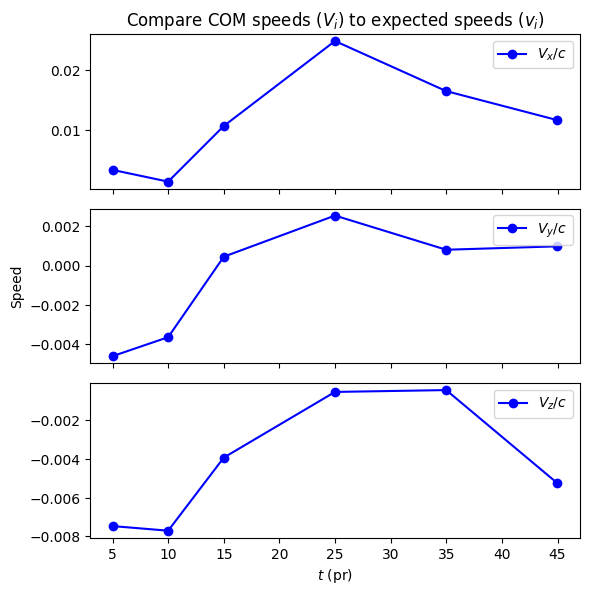

In [9]:
# T_pr = 2*np.pi/get_mass(data.alpha,data.beta) * data.rescale_B*data.a[0]**data.rescale_s

axis = ["x", "y", "z"]

fig, axes = plt.subplots(3,1,figsize=(6,6),tight_layout=True,sharex=True)

for i, ax in enumerate(axes):

#     ax.plot(data.t[timeslices],expected_velocities[:,i]/c_pr,ls='-.',label="$v_{}/c$".format(axis[i]), c='seagreen')

    ax.plot(data.t[timeslices][:-1],com_velocities[:,i]/c_pr,marker='o',label="$V_{}/c$".format(axis[i]), c='b')

    ax.legend()
    if i==0:
        ax.set_title("Compare COM speeds ($V_i$) to expected speeds ($v_i$)")
    if i==1:
        ax.set_ylabel(r"Speed")
    if i==2:
        ax.set_xlabel(r"$t$ (pr)")
        
# axes[0].set_ylim(0.009, 0.011)

plt.savefig(os.path.join(output_dir,f"compare speeds{f_ext}.png"),dpi=300,bbox_inches='tight')
plt.show()

# If previous data saved...

In [ ]:
timeskip = 2

pos_com = np.loadtxt(os.path.join(output_dir,"pos_com.txt"))
com_dict = {t:com for t,com in zip(data.t[::timeskip],pos_com)}
pickle.dump(com_dict,open(os.path.join(output_dir,f"coms_t_dict{f_ext}.p"),'wb'))

v_com = np.loadtxt(os.path.join(output_dir,"velocity_com.txt"))
v_com_dict = {t:v for t,v in zip(data.t[::timeskip],v_com)}
pickle.dump(v_com_dict,open(os.path.join(output_dir,f"com_velocities_t_dict{f_ext}.p"),'wb'))

v_exp = np.loadtxt(os.path.join(output_dir,"velocity_expected.txt"))
v_exp_dict = {t:v for t,v in zip(data.t[::timeskip],v_exp)}
pickle.dump(v_exp_dict,open(os.path.join(output_dir,f"expected_velocities_t_dict{f_ext}.p"),'wb'))